In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline 

## Whale portfolio data sort and Clean ##

In [3]:
# Use the Pathlib libary to set the path to the CSV
whale_returns = Path("Resources/whale_returns.csv")

# Use the file path to read the CSV into a DataFrame
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Sort in ascending order
whale_returns_df.sort_index(ascending = True, inplace = True)

#check df has worked
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().sum()
whale_returns_df[whale_returns_df.isnull().any(axis = 1)]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN


In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Harolds data sort and clean ##

In [6]:
# Use the Pathlib libary to set the path to the CSV
algo_returns = Path("Resources/algo_returns.csv")

# Use the file path to read the CSV into a DataFrame
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Sort in ascending order
algo_returns_df.sort_index(ascending = True, inplace = True)

#check df has worked
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## sp500_history data sort and clean ##

In [10]:
# Use the Pathlib libary to set the path to the CSV
sp500_history = Path("Resources/sp500_history.csv")

# Use the file path to read the CSV into a DataFrame
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Sort in ascending order
sp500_history_df.sort_index(ascending = True, inplace = True)

#check df has worked
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
#findout data types.
sp500_history_df.dtypes

Close    object
dtype: object

In [13]:
# Remove $ from sp_500
# remove $ sign:
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
# change to decimal:
sp500_history_df["Close"] = sp500_history_df["Close"].astype(float)

C:\Users\USER\AppData\Local\Temp/ipykernel_20672/280550322.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")


In [14]:
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
# Calculate Daily Returns
sp500_history_df["Close"] = sp500_history_df["Close"].pct_change()  
sp500_history_df["Close"].head()

Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
Name: Close, dtype: float64

In [17]:
# Drop nulls
sp500_history_df.dropna(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.columns = ["SP500"]
sp500_history_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns ##

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
porfolios_df = pd.concat([whale_returns_df,algo_returns_df,sp500_history_df],axis = 1, join = "inner")
porfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Conduct Quantitative Analysis ## 

### Calculate and Plot the daily returns ###

<AxesSubplot:xlabel='Date'>

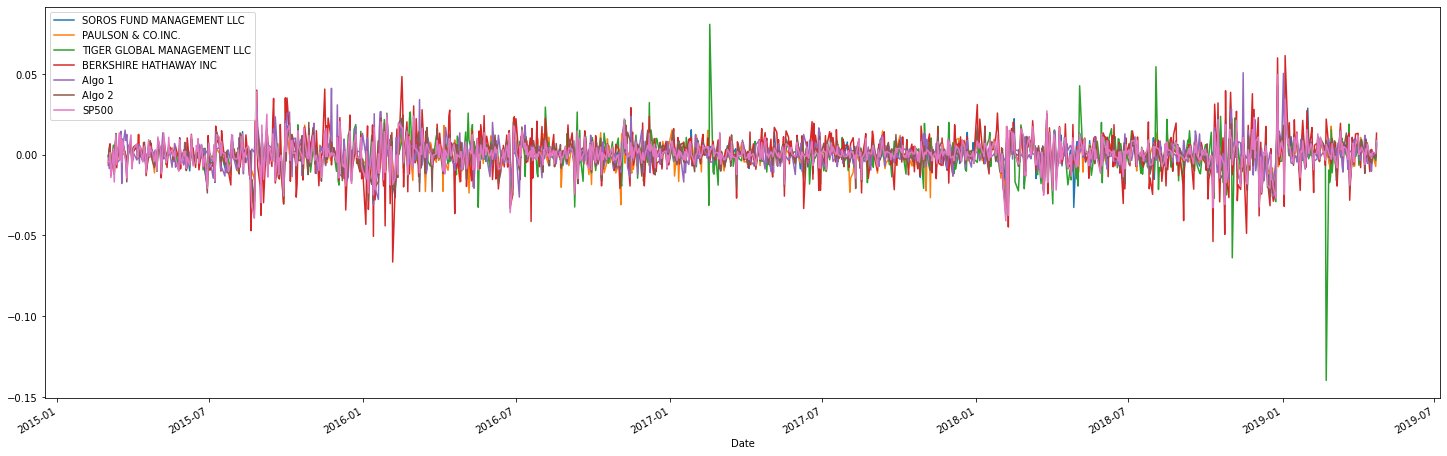

In [22]:
# Plot daily returns of all portfolios
porfolios_df.plot(figsize = (25, 8))

### Calculate and Plot cumulative returns ###

<AxesSubplot:xlabel='Date'>

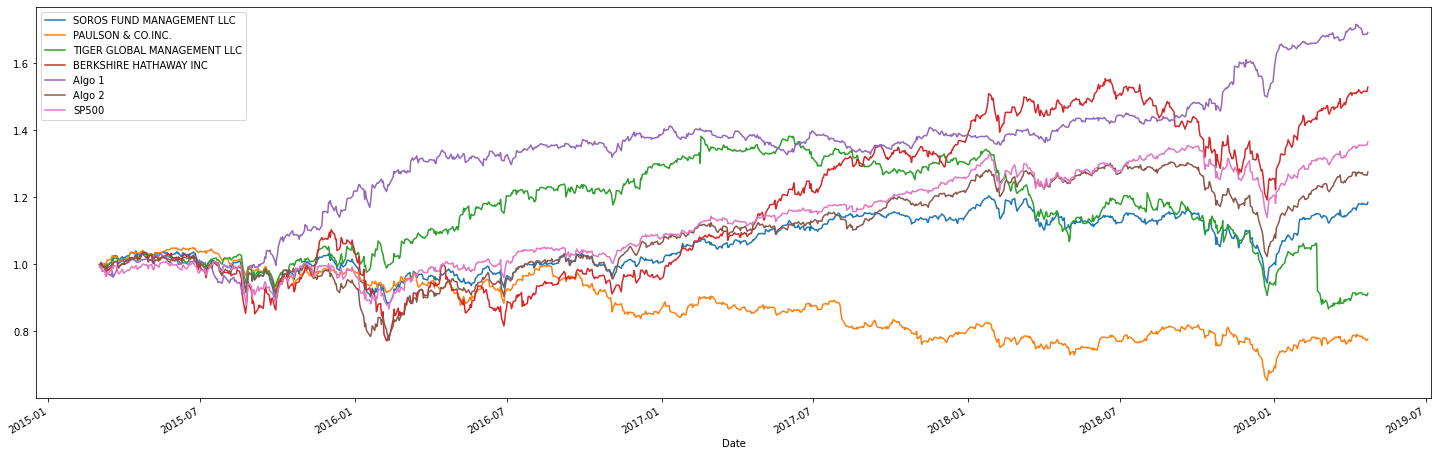

In [23]:
# Calculate cumulative returns of all portfolios
cum_df = 1 + (porfolios_df).cumsum()
# Plot cumulative returns
cum_df.plot(figsize= (25,8))

## Risk Analysis ##

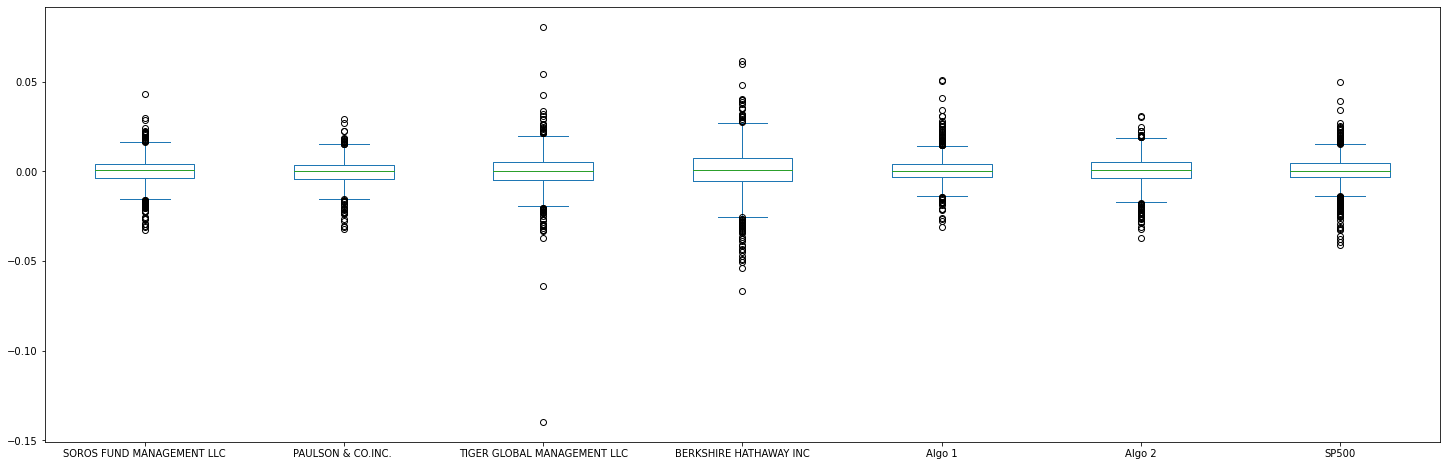

In [24]:
# Box plot to visually show risk
porfolios_df.plot(kind = "box", figsize = (25,8));

### Calculate Standard Deviations ###

In [25]:
# Calculate the daily standard deviations of all portfolios
std_daily = porfolios_df.std()
std_daily

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

## Determine which portfolios are riskier than the S&P 500 ##

In [26]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = std_daily["SP500"]
# Determine which portfolios are riskier than the S&P 500
std_daily > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

## Calculate the Annualized Standard Deviation ##

In [28]:
# Calculate the annualized standard deviation (252 trading days)
np.sqrt(porfolios_df.var() *252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

## Rolling Statistics ##

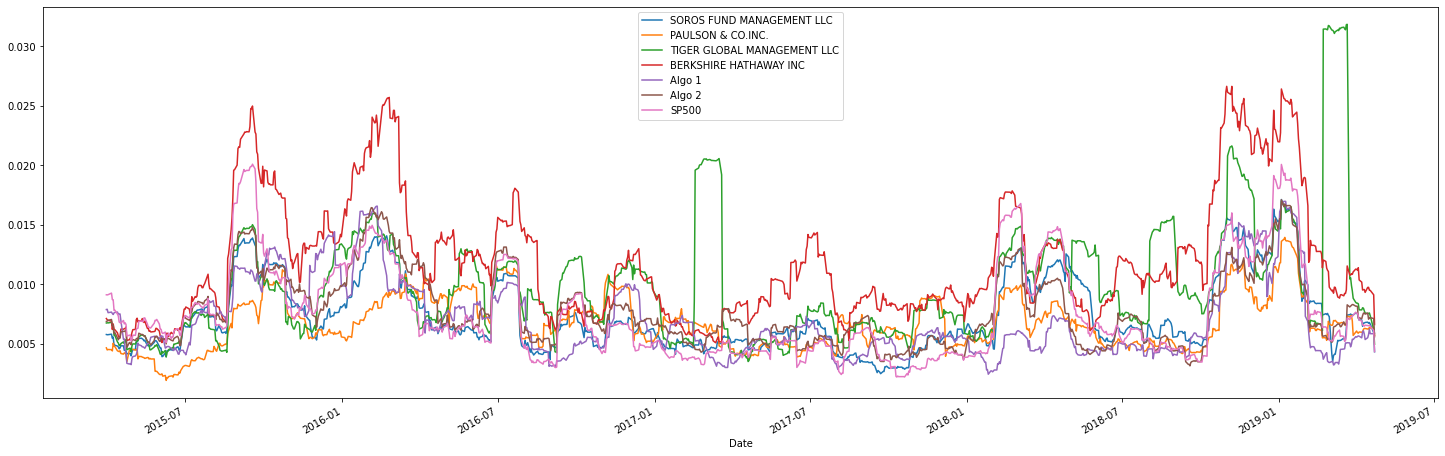

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21 = porfolios_df.rolling(window=21).std()
# Plot the rolling standard deviation
std_rolling_21.plot(figsize =(25, 8));

## Calculate and plot the correlation ##

In [34]:
import seaborn as sns
%matplotlib inline

#Calculate and plot the correlation
portfolios_correlation = porfolios_df.corr()


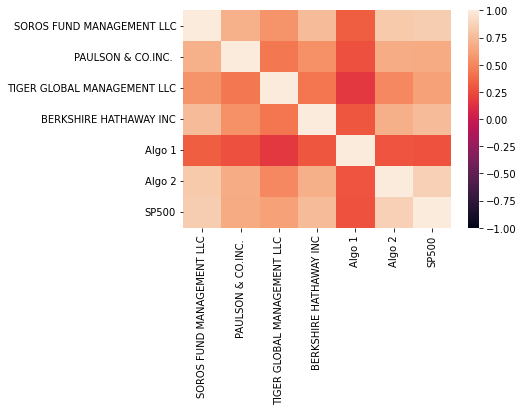

In [36]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(portfolios_correlation, vmin=-1, vmax=1);

In [ ]:
 
 Whale Returns
Read the Whale Portfolio daily returns and clean the data # Reading whale returns
  # Count nulls
  # Drop nulls
  Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data # Reading algorithmic returns
  # Count nulls
  # Drop nulls
  S&P 500 Returns
Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.  # Reading S&P 500 Closing Prices
  # Check Data Types
  # Fix Data Types
  # Calculate Daily Returns
  # Drop nulls
  # Rename `Close` Column to be specific to this portfolio.
  Combine Whale, Algorithmic, and S&P 500 Returns
 # Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
  
 Conduct Quantitative Analysis
In this section, you will calculate and visualize performance and risk metrics for the portfolios. Performance Anlysis
Calculate and Plot the daily returns.
 # Plot daily returns of all portfolios
  Calculate and Plot cumulative returns.
 # Calculate cumulative returns of all portfolios

# Plot cumulative returns
  
 Risk Analysis
Determine the risk of each portfolio:
Create a box plot for each portfolio. Calculate the standard deviation for all portfoliosDetermine which portfolios are riskier than the S&P 500Calculate the Annualized Standard Deviation
 Create a box plot for each portfolio
 # Box plot to visually show risk
  Calculate Standard Deviations
 # Calculate the daily standard deviations of all portfolios
  Determine which portfolios are riskier than the S&P 500
 # Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
  Calculate the Annualized Standard Deviation
 # Calculate the annualized standard deviation (252 trading days)
  
 Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta. 
Calculate and plot the rolling standard deviation for all portfolios using a 21-day windowCalculate the correlation between each stock to determine which portfolios may mimick the S&P 500Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500
 Calculate and plot rolling std for all portfolios with 21-day window
 # Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
  Calculate and plot the correlation
 # Calculate the correlation

# Display de correlation matrix
  Calculate and Plot Beta for a chosen portfolio and the S&P 500
 # Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend
  Rolling Statistics Challenge: Exponentially Weighted Average
An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half life for each portfolio, using standard deviation (std) as the metric of interest. # Use `ewm` to calculate the rolling window
  
 Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
 # Annualized Sharpe Ratios
  # Visualize the sharpe ratios as a bar plot
  Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Write your answer here! 
 Create Custom Portfolio
In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 
Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.Calculate the weighted returns for the portfolio assuming an equal number of shares for each stockJoin your portfolio returns to the DataFrame that contains all of the portfolio returnsRe-run the performance and risk analysis with your portfolio to see how it compares to the othersInclude correlation analysis to determine which stocks (if any) are correlated
 Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
 # Reading data from 1st stock
  # Reading data from 2nd stock
  # Reading data from 3rd stock
  # Combine all stocks in a single DataFrame
  # Reset Date index
  # Reorganize portfolio data by having a column per symbol
  # Calculate daily returns

# Drop NAs

# Display sample data
  Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
 # Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data
  Join your portfolio returns to the DataFrame that contains all of the portfolio returns
 # Join your returns DataFrame to the original returns DataFrame
  # Only compare dates where return data exists for all the stocks (drop NaNs)
  Re-run the risk analysis with your portfolio to see how it compares to the others
 Calculate the Annualized Standard Deviation
 # Calculate the annualized `std`
  Calculate and plot rolling std with 21-day window
 # Calculate rolling standard deviation

# Plot rolling standard deviation
  Calculate and plot the correlation
 # Calculate and plot the correlation
  Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500
 # Calculate and plot Beta
  Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
 # Calculate Annualized Sharpe Ratios
  # Visualize the sharpe ratios as a bar plot
  How does your portfolio do?
Write your answer here!